In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyclistic-bike-share/202110-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202105-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202109-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202111-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202107-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202202-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202203-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202108-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202106-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202201-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202104-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202112-divvy-tripdata.csv


<h1 align="center">Cyclistic Bike Share Data Analysis - Project</h1>

<h3 align="right">By - <a href="https://www.linkedin.com/in/sahrul59/">Muhamad Sahrul</a></h3>

# **Introduction**
This case study is part of the [*Google Data Analytics Professional Certificate*](https://grow.google/certificates/data-analytics/#?modal_active=none). The certificate program covers the data analysis process, as defined by Google:

1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act


#### **Case Study Challenge**
Cyclistic wants you to analyze their user data to find the main difference in the bike usage and behavior between their two types of users; "casual" who pays for a single ride or fullday pass to use the service and "member" who pays for a yearly subscription to use the service.

# **Scenario**

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-sharing company in Chicago. The marketing director believes that the company's future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic's bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be supported with compelling data insights and professional data visualizations.



# **Characters and teams**

- Cyclistic: A bike-sharing program featuring more than 5,800 bikes and 600 docking stations. Cyclistic differentiates itself from other companies by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive for people with disabilities and riders who cannot use standard two-wheelers. The majority of riders choose traditional bicycles; about 8% of riders use assisted options. Cyclists are more likely to cycle for leisure, but around 30% use it to commute to work every day.

- Lily Moreno: Your marketing director and manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike share program. This may include email, social media, and other channels.

- Cyclistic marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting on data that helps guide Cyclistic's marketing strategy. You joined the team six months ago and have been busy learning about Cyclistic's mission and business goals - and how you, as a junior data analyst, can help Cyclistic achieve them.

- Cyclistic's executive team: The highly detail-oriented executive team will decide whether they approve the recommended marketing program.



# **About the company**
In 2016, Cyclistic launched a successful bike-sharing offering. Since then, the program has grown to a fleet of 5,824 bikes that are geo-tracked and locked into a network of 692 stations across Chicago. Bikes can be accessed from one station and returned to another at any point in the system.

To date, Cyclistic's marketing strategy has relied on efforts to build general awareness and attract a broad segment of consumers. One approach that helped make this happen was pricing flexibility: one-way tickets, full-day passes, and annual memberships. Customers who purchase one-way or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic's financial analysts have concluded that annual members are much more profitable than casual riders. Although pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be the key to future growth. Rather than creating a marketing campaign that targets new customers, Moreno believes that there is an opportunity to convert casual riders into members. He notes that casual riders are already aware of Cyclistic's programs and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design a marketing strategy aimed at converting casual riders into annual members. However, to do so, the team of marketing analysts needed to better understand the differences between annual members and casual riders, why riders would be willing to purchase a membership, and how digital media could impact their marketing tactics. Moreno and his team were interested in analyzing Cyclistic's bike trip data to identify trends.


# Business Objective

Analyzing the past 12-month data in order to find the difference in bike usage and behavior between **casual users** (*who pays for a single-ride or a full-day service*) and **annual members** (*who pays for a yearly subscription to use the service*).
> The Director of Marketing, Lily Moreno, believes that maximizing the number of annual members will be key to future growth.
>
>Furthermore, she believes that there is very good chance to convert casual users into members instead of creating a marketing campaign that targets all-new customers, as she notes that casual riders are already aware of the Cylistic program.

# Ask

- Which bike type is preferable for both users?
- Which weekday is preferable for both users?
- What is the average duration per weekday for both users?
- Seasons that are more suitable for both users?

# Prepare

The data used in this case study is a publicly available repository of monthly datasets from Motivate International Inc.

The datasets are available for download <a href='https://divvy-tripdata.s3.amazonaws.com/index.html'>here</a>.

The datasets from the previous 12 months have been downloaded from <a href='https://www.kaggle.com/datasets/evangower/cyclistic-bike-share'>this</a> Kaggle dataset.

## Importing Datasets


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading datasets for all 12-month data (2021 Q2 -> 2022 Q1) 
apr2021 = pd.read_csv("../input/cyclistic-bike-share/202104-divvy-tripdata.csv")
may2021 = pd.read_csv("../input/cyclistic-bike-share/202105-divvy-tripdata.csv")
june2021 = pd.read_csv("../input/cyclistic-bike-share/202106-divvy-tripdata.csv")
july2021 = pd.read_csv("../input/cyclistic-bike-share/202107-divvy-tripdata.csv")
aug2021 = pd.read_csv("../input/cyclistic-bike-share/202108-divvy-tripdata.csv")
sep2021 = pd.read_csv("../input/cyclistic-bike-share/202109-divvy-tripdata.csv")
oct2021 = pd.read_csv("../input/cyclistic-bike-share/202110-divvy-tripdata.csv")
nov2021 = pd.read_csv("../input/cyclistic-bike-share/202111-divvy-tripdata.csv")
dec2021 = pd.read_csv("../input/cyclistic-bike-share/202112-divvy-tripdata.csv")
jan2022 = pd.read_csv("../input/cyclistic-bike-share/202201-divvy-tripdata.csv")
feb2022 = pd.read_csv("../input/cyclistic-bike-share/202202-divvy-tripdata.csv")
mar2022 = pd.read_csv("../input/cyclistic-bike-share/202203-divvy-tripdata.csv")

In [4]:
# List of all months' data
all_df = [apr2021, may2021, june2021, july2021, aug2021, sep2021, oct2021, nov2021, dec2021, jan2022, feb2022, mar2022]

# Aggregating them into a single dataset
trip_data = pd.concat(all_df)
df = trip_data

In [5]:
trip_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284037,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual
284038,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual
284039,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member
284040,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member


In [6]:
trip_data.shape

(5723532, 13)

In [7]:
# Quick view on the data (first 5 rows)
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [8]:
# Infromation about the data
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


In [9]:
trip_data.describe()


,start_lat,start_lng,end_lat,end_lng
count,5.723532e+06,5.723532e+06,5.718816e+06,5.718816e+06
mean,4.190065e+01,-8.764629e+01,4.190091e+01,-8.764650e+01
std,4.649557e-02,2.974885e-02,4.657768e-02,2.935251e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188132e+01,-8.766014e+01,4.188132e+01,-8.766028e+01
50%,4.189862e+01,-8.764194e+01,4.189897e+01,-8.764288e+01
75%,4.192889e+01,-8.762775e+01,4.192914e+01,-8.762775e+01
max,4.563503e+01,-7.379648e+01,4.216812e+01,-8.749000e+01


# Process

Lets start with some data cleaning and data manipulation..

In [10]:
# Changing data type for date columns
trip_data['started_at'] = pd.to_datetime(trip_data['started_at'])
trip_data['ended_at'] = pd.to_datetime(trip_data['ended_at'])

In [11]:
# Check If the end date comes before the start date
false_date = trip_data.loc[trip_data['started_at'] > trip_data['ended_at']]

# (No. of rows with false date, No. of coloumns)
false_date.shape

(145, 13)

In [12]:
# Rows with false dates are being removed
td_clean = trip_data.drop(false_date.index.to_list())

In [13]:
# Examining duplicates
td_clean.duplicated().sum()

0

In [14]:
# Looking into missing values
td_clean.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745239
start_station_id      745236
end_station_name      796092
end_station_id        796092
start_lat                  0
start_lng                  0
end_lat                 4715
end_lng                 4715
member_casual              0
dtype: int64

In [15]:
# All rows with missing values are being removed
td_dropna = td_clean.dropna()

# (No. of rows after dropping, No. of coloumns)
td_dropna.shape

(4640363, 13)

Let us now derive some features for our analysis..

In [16]:
# Function to extract season from datetime
def ext_season(month):
    if (month >= 3) and (month <= 5):
        return 'Spring'
    elif (month >= 6) and (month <= 8):
        return 'Summer'
    elif (month >= 9) and (month <= 11):
        return 'Autumn'
    else:
        return 'Winter'

In [17]:
# Extracting weekday (Monday = 0, Sunday = 6)
td_clean['weekday'] = td_clean['started_at'].dt.dayofweek

# Calculating trip duration field, in minutes
td_clean['duration_minutes'] = round((td_clean['ended_at'] - td_clean['started_at']).dt.total_seconds() / 60, 2)

# Extracting season
td_clean['season'] = td_clean['started_at'].dt.month.map(ext_season)

In [18]:
# Replace with weekday names instead of numbers
Weekday_Names = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
td_clean['weekday'] = td_clean['weekday'].map(Weekday_Names) 

# Analyze

summary of analysis

In [19]:
#Count the rides; given the user type
td_ut = td_clean['member_casual'].value_counts().rename_axis('member_casual').reset_index(name = 'count')

td_ut

,member_casual,count
0,member,3176284
1,casual,2545997


In [20]:
# Count the rides; given both user, and bike type
td_ut_bt = td_clean.groupby(['member_casual','rideable_type'])['ride_id'].count().rename_axis(['member_casual', 'rideable_type']).reset_index(name = 'count')

td_ut_bt

,member_casual,rideable_type,count
0,casual,classic_bike,1257376
1,casual,docked_bike,303932
2,casual,electric_bike,984689
3,member,classic_bike,1992598
4,member,electric_bike,1183686


In [21]:
# Count the rides; given both user, and weekday
td_wd_ut = td_clean.groupby(['member_casual', 'weekday'])['weekday'].count().rename_axis(['member_casual', 'weekday']).reset_index(name = 'count')

td_wd_ut

,member_casual,weekday,count
0,casual,Friday,364214
1,casual,Monday,292941
2,casual,Saturday,549898
3,casual,Sunday,482692
4,casual,Thursday,293576
5,casual,Tuesday,276313
6,casual,Wednesday,286363
7,member,Friday,453005
8,member,Monday,439351
9,member,Saturday,431255


In [22]:
# Average ride duration; given user, and weekday
Avg_td_ud_ut = td_clean.groupby(['member_casual', 'weekday'])['duration_minutes'].mean().rename_axis(['member_casual', 'weekday']).reset_index(name = 'avg_duration_m')

# Avg duration rounded to 2 decimal points
Avg_td_ud_ut['avg_duration_m'] = round(Avg_td_ud_ut['avg_duration_m'], 2)

Avg_td_ud_ut

,member_casual,weekday,avg_duration_m
0,casual,Friday,30.10
1,casual,Monday,31.48
2,casual,Saturday,34.28
3,casual,Sunday,37.41
4,casual,Thursday,27.88
5,casual,Tuesday,27.43
6,casual,Wednesday,27.77
7,member,Friday,13.14
8,member,Monday,12.97
9,member,Saturday,14.99


In [23]:
# Count the rides; given both user, and season
td_s_ut = td_clean.groupby(['member_casual', 'season'])['season'].count().rename_axis(['member_casual', 'season']).reset_index(name = 'count')

td_s_ut

,member_casual,season,count
0,casual,Autumn,727899
1,casual,Spring,483270
2,casual,Summer,1225185
3,casual,Winter,109643
4,member,Autumn,1019056
5,member,Spring,669341
6,member,Summer,1130737
7,member,Winter,357150


# Share

Support visualization and key findings..

In [24]:
def chart_cust(chart):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.set_palette(['#C2240B', '#F39A05'])
    chart
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

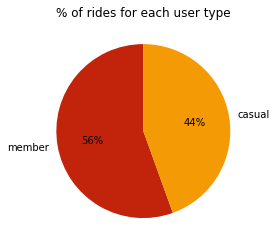

In [25]:
#Count the rides; given the user type
td = plt.pie(td_ut['count'], labels=td_ut['member_casual'], autopct='%.0f%%',
            startangle=90, colors = ['#C2240B', '#F39A05'])
plt.title('% of rides for each user type')
chart_cust(td)

##### Surprisingly, annual members have never used docked bikes in the previous year.

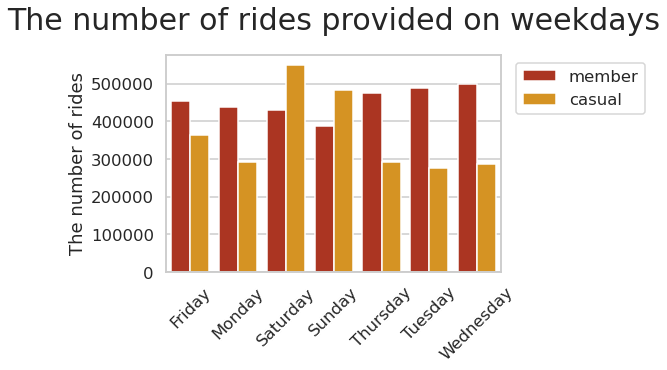

In [26]:
# Count the rides; given both user, and weekday
td = sns.barplot(data=td_wd_ut, x='weekday', y='count', hue='member_casual', hue_order=['member', 'casual'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('The number of rides provided on weekdays', fontsize=30, pad=25)
plt.xlabel('')
plt.ylabel('The number of rides')
chart_cust(td)

##### Weekends are the busiest times for casual users.

##### Throughout the rest of the week, members are more active.

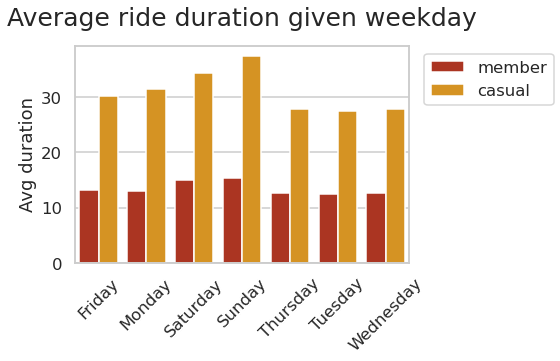

In [27]:
# Average ride duration; given user, and weekday
td = sns.barplot(data=Avg_td_ud_ut, x='weekday', y='avg_duration_m', hue='member_casual', hue_order=['member', 'casual'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Average ride duration given weekday', fontsize=25, pad=20)
plt.xlabel('')
plt.ylabel('Avg duration')
chart_cust(td)

#### Over the week, however, the average casual ride lasts twice as long as the members'.

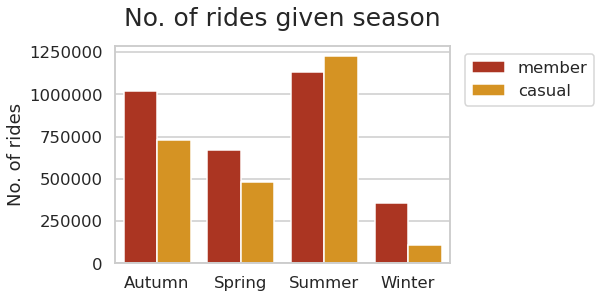

In [28]:
# Count the rides; given both user, and season
td = sns.barplot(data=td_s_ut, x='season', y='count', hue='member_casual', hue_order=['member', 'casual'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('No. of rides given season', fontsize=25, pad=20)
plt.xlabel('')
plt.ylabel('No. of rides')
chart_cust(td)

##### During the summer, casual users are the most active.

##### During the rest of the year, members are more active than casuals.

# Act

***In light of the business objective and the extracted insights, I propose:***
- Offering some kind of promotion during the summer or on weekends.
- Including docked bicycles in annual memberships.